In [1]:
import random
import copy

In [2]:
import numpy as np

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
Graphs = [] # contains all 50 different graphs

In [5]:
while len(Graphs) < 50:
    G = nx.cycle_graph(50) #initialise graph
    steps = 0
    
    #print(len(Graphs))
    no_of_edges = 0
    while steps < 100 : 
        #print(steps)
        r1 = random.randrange(0,50)
        d1 = G.degree[r1]

        if d1<3:
            # lower bound inclusive & upper bound not inclusive in range
            # r2 = random.sample(range(r1-5,r1-1), 4)   
            l1 = [*range(r1-5,r1-1,1)]
            # lower bound inclusive & upper bound not inclusive in range
            # r3 = random.sample(range(r1+2,r1+6), 4)
            l2 = [*range(r1+2,r1+6,1)]
            joinedList = l1 + l2
            
            #if the nodes go out of the range [0,49] adding/subtracting 50 to make it cyclic
            for i in range(8):
                if joinedList[i] < 0:
                    joinedList[i] += 50
                elif joinedList[i] > 49:
                    joinedList[i] -= 50
            edge_added = False
            
            stepss = 0 #using this to stop the loop when there are only few edges left
            while edge_added == False and stepss < 50:
                r2 = random.choice(joinedList)
                d2 = G.degree[r2]
                if d2<3:
                    edge_added = True #the looop will keep running either if the edge has not been added or if the stepss count < 50
                    G.add_edge(r1,r2)
                stepss += 1
        steps += 1
    #print(no_of_edges)
    Graphs.append(G)
    

In [6]:
def BFS(G, start, finish):
    #print("SF", start, finish)
    vis = [0] * 50
    q = [[start, 0]] #adding the start node to the queue
    #path = list()
    vis[start] = 1 #mark the start node as visited
    dis = 0
    while len(q) != 0:
        node =  q.pop(0)
        #print("path" , path)
        #node = path[-1]
        if node[0] == finish :
            return node[1]
        for j in G[node[0]]:
            if vis[j] != 1:
                q.append([j, node[1] + 1]) #appending teh negihbors and the distance from the parent
                vis[j] = 1

In [7]:
def init_rand_pos():
    prey = random.randint(0, 49)
    pred = random.randint(0, 49)

    agent = random.randint(0, 49)
    while agent == prey or agent == pred: #loop generates random posiotns for agent until it is different from prey/predator
        agent = random.randint(0, 49)
    return (prey, pred, agent) 

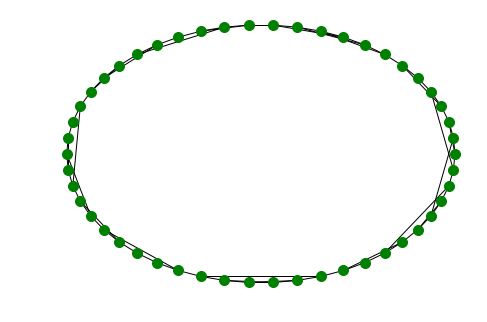

In [8]:
nx.draw_circular(Graphs[42], scale = 1, node_size=100, node_color='green')
plt.draw()

In [8]:
def move_prey(G, prey):
    move = random.randint(0, G.degree(prey)) #choosing which neighbor to move to or stay in its location(=0)
    if move == 0:
        return prey
    else:
        return [i for i in G.neighbors(prey)][move-1] #forms a list of the neighbors and chooses one of it

In [9]:
def move_pred(G, pred, agent):
    min_ad = 100
    dis_pred = []
    dis_pred_choice = []
    
    for i in G[pred]:
        agent_dis = BFS(G, i, agent)
        dis_pred.append([i, agent_dis]) #stores all the neighbors and the agent distance from Predator's neighbors
        if agent_dis < min_ad:
            min_ad = agent_dis #finds minimun among this
    
    for i in range(len(dis_pred)):
        if min_ad == dis_pred[i][1]:
            dis_pred_choice.append(dis_pred[i][0]) #adding only the ones that have the same minimum distance
            
    return random.choice(dis_pred_choice) #breaking ties at random

In [10]:
def next_pos_agent(dis):
    min_yd = 100
    max_dd = -1
    nextpos_agent_choice = []
    nextpos_agent_temp = []
    for i in range(len(dis)):
        if dis[i][1] <= min_yd:
            min_yd = dis[i][1] #finds minimum distance from the neighbors to the prey
            
    for i in range(len(dis)):
        if dis[i][1] == min_yd:
            nextpos_agent_temp.append(dis[i])#add the the neighbors with the smallest distance from prey to the new list
    
    for i in range(len(nextpos_agent_temp)):#finds maximum distance from the neighbors to the predator among the new list
        if nextpos_agent_temp[i][2] > max_dd:
            max_dd = nextpos_agent_temp[i][2]
    
    for i in range(len(nextpos_agent_temp)):#add the the neighbors with the largest distance from predator to the new list
        if nextpos_agent_temp[i][2] == max_dd:
            nextpos_agent_choice.append(nextpos_agent_temp[i])
    
    return random.choice(nextpos_agent_choice)#breaking ties at random

# Agent 1

In [66]:
analytics1 = []
time_steps = [50, 100, 200, 500, 1000] #maximum number of steps for each set
for steps in time_steps:
    print(steps)
    success = 0 #agent's survival rate (when it catches the prey)
    fail1 = 0 #When agent's gets caught by the predator
    fail2 = 0 #when time is up
    for j in range(50):  
        #print(j)
        G = Graphs[j]
        for runs in range(100):
            prey, pred, agent = init_rand_pos() #initialize random start locations
            #print("RUN #", runs)
            #print(prey, pred, agent)
            time = 0
            while time < steps:
                min_yd = 100
                max_dd = -1
                x = BFS(G, agent, pred) #finds distance from agent to predator
                y = BFS(G, agent, prey) #finds distance from agent to prey
                #print("xy", x, y)
                dis = []
                select = False 
                for i in G[agent]:
                    #print("i", i)
                    prey_dis = BFS(G, i, prey) #finds distance from agent's neighbor to prey
                    #print("prey_dis", prey_dis)
                    pred_dis = BFS(G, i, pred) #finds distance from agent's neighbor to predator
                    
                    if prey_dis < y and pred_dis > x:
                        select = True
                    elif prey_dis < y  and pred_dis == x:
                        select = True
                    elif prey_dis == y and pred_dis > x:
                        select = True
                    elif prey_dis == y and pred_dis == x:
                        select = True
                    elif pred_dis > x:
                        select = True
                    elif pred_dis == x:
                        select = True
                    
                    #only adds if the neighbor satisfies above conditions
                    if select == True:
                        dis.append([i, prey_dis, pred_dis])

                #print(dis)

                if bool(dis) != False: #runs only if there any neighbor satisfies the conditions 
                    agent = next_pos_agent(dis)[0] 
                    
                #otherwise the agent stays at its position

                #print("next_pos", next_pos)       
                if agent == prey: #break if the agent finds the prey
                    break
                
                #it cannot move to the predator's location because if teh predator is on the agent's neighbors, the agent won't move
                #prey/predator move
                prey = move_prey(G, prey)
                if agent == prey: #break if the agent finds the prey
                    break
                pred = move_pred(G, pred, agent)
                
                #print(prey, pred, agent)
                #now if the prey/predator find agent, the run exits
                if agent == pred:
                    break
                time += 1
                #print("time",time)
            
            #if the prey/predator exist at the same location as the agent, then the agent dies
            if agent == pred:
                fail1 += 1
            elif agent == prey:
                success += 1
            elif time == steps:
                fail2 += 1

    analytics1.append([success/50, fail1/50, fail2/50]) #appending analytics to a list

50
100
200
500
1000


In [67]:
print(analytics1)

[[79.32, 20.68, 0.0], [79.28, 20.72, 0.0], [79.22, 20.78, 0.0], [78.76, 21.24, 0.0], [79.2, 20.8, 0.0]]


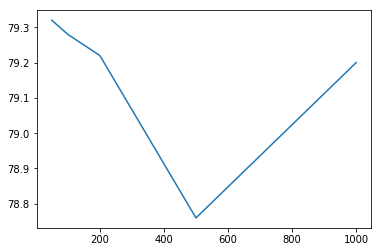

In [68]:
y = [i[0] for i in analytics1]
plt.plot(time_steps, y)

# Agent 2

In [30]:
def BFSwPred(G, start, finish, pred):
    vis = [0] * 50
    q = [[start, 0]]
    #path = list()
    vis[start] = 1
    vis[pred] = 1 #marking it visited before so it is not added to queue ever when finding a path
    dis = 0
    #new_path = -1
    #q.append(list([0,0]))
    #print(q)
    while len(q) != 0:
        node =  q.pop(0)
        #print("path" , path)
        #node = path[-1]
        #print("node " , node)
        if node[0] == finish :
            return node[1]
        for i in G[node[0]]:
            if vis[i] != 1:
                q.append([i, node[1] + 1])
                vis[i] = 1

In [31]:
prey, pred, agent

(34, 47, 47)

In [32]:
analytics2 = []
time_steps = [50, 100, 200, 500, 1000] #maximum number of steps for each set
for steps in time_steps:
    print(steps)
    success = 0
    fail1 = 0
    fail2 = 0
    for j in range(50):  
        #print(j)
        G = Graphs[j]
        for runs in range(100):
            prey, pred, agent = init_rand_pos() #initialize random start locations
            #print("RUN #", runs)
            #print(prey, pred, agent)
            time = 0
            while time < 1000:
                #min_yd = 100
                #max_dd = -1
                x = BFS(G, agent, pred) #finds distance from agent to predator
                y = BFS(G, agent, prey) #finds distance from agent to prey
                select = False
                dis = []
                for i in G[agent]:
                    prey_dis = BFSwPred(G, i, prey, pred) #finds distance from agent's neighbor to prey that does not include the predator
                    #print("prey_dis", prey_dis)
                    
                    #if NO path exit loop, agent stays at its location
                    if prey_dis == None:
                        break
                    pred_dis = BFS(G, i, pred) #finds distance from agent's neighbor to predator
                    if prey_dis < y and pred_dis > x:
                        select = True
                    elif prey_dis < y  and pred_dis == x:
                        select = True
                    elif prey_dis == y and pred_dis > x:
                        select = True
                    elif prey_dis == y and pred_dis == x:
                        select = True
                    elif pred_dis > x:
                        select = True
                    elif pred_dis == x:
                        select = True

                    if select == True:
                        dis.append([i, prey_dis, pred_dis])

                #print(dis)

                if bool(dis) != False:
                    agent = next_pos_agent(dis)[0] 

                #print("next_pos", next_pos) 
                #it cannot move to the predator's location because if teh predator is on the agent's neighbors, the agent won't move
                if agent == prey: #break if the agent finds the prey
                    break
                #prey/predator move
                prey = move_prey(G, prey)
                if agent == prey:  #break if the agent finds the prey
                    break
                    
                pred = move_pred(G, pred, agent)
                #print(prey, pred, agent)

                if agent == pred:  #now if the predator find agent, the run exits
                    break
                time += 1
                #print("time",time)
            
             #if the prey/predator exist at the same location as the agent, then the agent dies
            if agent == pred:
                fail1 += 1
            elif agent == prey:
                success += 1
            elif time == steps:
                fail2 += 1

    analytics2.append([success/50, fail1/50, fail2/50])  #appending analytics to a list

50
100
200
500
1000


In [44]:
print(analytics2)

[[85.24, 14.76, 0.0], [85.34, 14.66, 0.0], [86.48, 13.52, 0.0], [86.42, 13.58, 0.0], [86.06, 13.94, 0.0]]


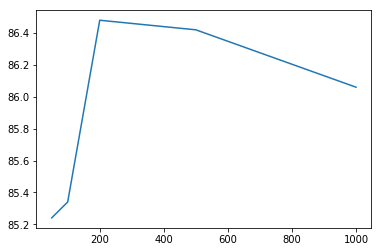

In [45]:
y = [i[0] for i in analytics2]
plt.plot(time_steps, y)

# Agent 3

In [70]:
'''initialized with 1/49 probability for all the nodes in the graph where the agent is not
located and 0 for the node where the agent is present since the prey/predator cannot start at those locations.'''
def init_prey_belief(agent):
    belief = [1/49] * 50 
    belief[agent] = 0
    return belief

In [37]:
#When the survey drone finds the prey/predator, the agent updates the belief with 1 at the node where the prey/predator exists and 0 for all other nodes.
def found(survey_node):
    belief = [0] * 50
    belief[survey_node] = 1
    return belief

In [38]:
def not_found(belief, G, survey_node):
    
    not_in_survey_prob = 1 - belief[survey_node]
    belief[survey_node] = 0
    for i in range(50):
        belief[i] = belief[i]/not_in_survey_prob

    return belief

In [39]:
def move_prey_belief(belief, G):
    belief_new = [0] * 50
    for i in range(50):
        for j in G[i]:
            belief_new[i] += belief[j] * (1/(G.degree(j)+1)) #adds the probability for the prey to move from neighbor j -> i
        belief_new[i] += belief[i] * (1/(G.degree(i)+1)) #adds the probability of prey staying at its location
        
    return belief_new
            

In [40]:
#ceratin if there is only one node with 1 probability in the graph and rest are 0
def certain(belief):
    count = 0
    for i in range(50):
        if belief[i] == 1:
            count += 1
    return count == 1 

In [41]:
def max_prey_belief(belief):
    max_value = max(belief) #finds maximum value
    choice_ =  []
    for i in range(50):
        if belief[i] == max_value: #finds all nodes with same highest probability
            choice_.append(i)
    return random.choice(choice_) #breaking ties at random

In [69]:
analytics3 = [] #maximum number of steps for each set
time_steps = [50, 100, 200, 500, 1000]
for steps in time_steps:
    print(steps)
    success = 0
    fail1 = 0
    fail2 = 0
    agent_certain = 0
    total_steps = 0
    for j in range(50):  
        #print(j)
        G = Graphs[j]
        for runs in range(100):
            prey, pred, agent = init_rand_pos() #initialize random start locations
            #print("RUN #", runs)
            #print("init", prey, pred, agent)
            belief = init_prey_belief(agent) #initialize belief for prey
            time = 0
            while time < steps:
                #print(belief)
                if certain(belief) != True: #only survey if agent is not certain about prey's location
                    survey_node = max_prey_belief(belief)
                    #print("survey_node", survey_node)
                    #print("before", belief, sum(belief))
                    if prey == survey_node:
                        belief = found(survey_node) #update belief (observational prob)
                    else:
                        belief = not_found(belief, G, survey_node) #update belief (observational prob)
                
                if certain(belief) == True:
                    agent_certain += 1  #increment counter if the agent is certain about the prey
                #print("after survey", belief, sum(belief))
                
                prey_belief_loc = max_prey_belief(belief) #prey's location at highest node belief
                #print("prey_belief", prey_belief)
                select = False
                dis = []
                x = BFS(G, agent, pred)  #finds distance from agent to predator
                y = BFS(G, agent, prey_belief_loc)  #finds distance from agent to prey
                for k in G[agent]:
                    #print("i", i)

                    prey_dis = BFS(G, k, prey_belief_loc) #finds distance from agent's neighbor to prey
                    #print("prey_dis", prey_dis)
                    pred_dis = BFS(G, k, pred) #finds distance from agent's neighbor to predator


                    if prey_dis < y and pred_dis > x:
                        select = True
                    elif prey_dis < y  and pred_dis == x:
                        select = True
                    elif prey_dis == y and pred_dis > x:
                        select = True
                    elif prey_dis == y and pred_dis == x:
                        select = True
                    elif pred_dis > x:
                        select = True
                    elif pred_dis == x:
                        select = True
                    
                    if select == True:  #only adds if the neighbor satisfies above conditions
                        dis.append([k, prey_dis, pred_dis])

                #print(dis)

                if bool(dis) != False: #runs only if there any neighbor satisfies the conditions 
                    agent = next_pos_agent(dis)[0] 
                 #otherwise the agent stays at its position
                
                #print("next_pos", next_pos)       
                if agent == prey: #break if the agent finds the prey
                    break

                belief = not_found(belief, G, agent) #update belief (observational prob)
                
                 #prey/predator move
                prey = move_prey(G, prey)
                
                if agent == prey:
                    break
                    
                belief = move_prey_belief(belief, G) #update belief (transitional prob)

                #print("trans", belief, sum(belief))
                pred = move_pred(G, pred, agent)
                #print("move", prey, pred, agent)
                 #now if the predator find agent, the run exits
                if agent == pred:
                    break

                time += 1
                total_steps += 1
                #print("time",time)
                
            #if the prey/predator exist at the same location as the agent, then the agent dies
            if agent == pred:
                fail1 += 1
            elif agent == prey:
                success += 1
            elif time == steps:
                fail2 += 1

    analytics3.append([success/50, fail1/50, fail2/50, agent_certain, total_steps])  #appending analytics to a list

50
100
200
500
1000


In [46]:
print(analytics3)

[[39.14, 60.04, 0.82, 2888, 54336], [40.82, 59.18, 0.0, 3150, 54333], [39.7, 60.3, 0.0, 2955, 54090], [39.74, 60.26, 0.0, 3018, 54163], [40.2, 59.8, 0.0, 2982, 55052]]


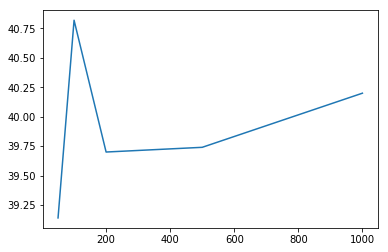

In [47]:
y = [i[0] for i in analytics3]
plt.plot(time_steps, y)

# Agent 4

In [51]:
analytics4 = []
time_steps = [50, 100, 200, 500, 1000]
for steps in time_steps:
    print(steps)
    success = 0
    fail1 = 0
    fail2 = 0
    agent_certain = 0
    total_steps = 0
    for j in range(50):  
        #print(j)
        G = Graphs[j]
        for runs in range(100):
            prey, pred, agent = init_rand_pos()
            #print("RUN #", runs)
            #print("init", prey, pred, agent)
            belief = init_prey_belief(agent)    
            time = 0
            while time < steps: 
                if certain(belief) != True:
                    survey_node = max_prey_belief(belief,)
                    #print("survey_node", survey_node)

                    #print("before", belief, sum(belief))
                    if prey == survey_node:
                        belief = found(survey_node) #update belief (observational prob)
                    else:
                        belief = not_found(belief, G, survey_node) #update belief (observational prob)

                if certain(belief) == True:
                    agent_certain += 1
                #print("after survey", belief, sum(belief))
                prey_belief = max_prey_belief(belief)
                #print("prey_belief", prey_belief)
                select = False
                dis = []
                x = BFS(G, agent, pred)
                y = BFS(G, agent, prey_belief)
                for i in G[agent]:
                    #print("i", i)

                    prey_dis = BFSwPred(G, i, prey, pred)  #finds distance from agent's neighbor to prey where predator is not located
                    #print("prey_dis", prey_dis)
                    #agent stays at same location if path not found
                    if prey_dis == None:
                        break
                    #print("prey_dis", prey_dis)
                    pred_dis = BFS(G, i, pred)


                    if prey_dis < y and pred_dis > x:
                        select = True
                    elif prey_dis < y  and pred_dis == x:
                        select = True
                    elif prey_dis == y and pred_dis > x:
                        select = True
                    elif prey_dis == y and pred_dis == x:
                        select = True
                    elif pred_dis > x:
                        select = True
                    elif pred_dis == x:
                        select = True

                    if select == True:
                        dis.append([i, prey_dis, pred_dis])

                #print(dis)

                if bool(dis) != False:
                    agent = next_pos_agent(dis)[0] 


                #print("next_pos", next_pos)       
                if agent == prey or agent == pred:
                    break

                belief = not_found(belief, G, agent) #update belief (observational prob)

                prey = move_prey(G, prey)
                belief = move_prey_belief(belief, G)  #update belief (transitional prob)

                #print("trans", belief, sum(belief))
                pred = move_pred(G, pred, agent)
                #print("move", prey, pred, agent)

                if agent == prey  or agent == pred:
                    break

                time += 1
                total_steps += 1
                #print("time",time)
            if agent == pred:
                fail1 += 1
            elif agent == prey:
                success += 1
            elif time == steps:
                fail2 += 1

    analytics4.append([success/50, fail1/50, fail2/50, agent_certain, total_steps])

50
100
200
500
1000


In [53]:
print(analytics4)

[[76.14, 23.86, 0.0, 2264, 38120], [76.06, 23.94, 0.0, 2117, 37454], [77.7, 22.3, 0.0, 2354, 38061], [76.92, 23.08, 0.0, 2312, 38222], [76.16, 23.84, 0.0, 2228, 37787]]


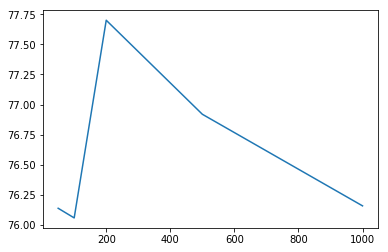

In [54]:
y = [i[0] for i in analytics4]
plt.plot(time_steps, y)

# Agent 5

In [55]:
def move_pred_belief(G, belief, pred, agent):  #transitional prob
    
    belief_new = [0] * 50

    for i in range(50):
        next_pred = move_pred(G, pred, agent)
        belief_new[next_pred] += 0.6 * belief[i] #since the agent can move to the neighbor with the shorted path to the agent with 0.6 prob
        for j in G[i]:
            belief_new[j] += 0.4 * belief[i] * (1/G.degree(i)) #and move to any neighbor 0.4 number of times
    
    return belief_new

In [56]:
def init_pred_belief(pred):
    belief = [0] * 50
    belief[pred] = 1
    
    return belief

In [57]:
def max_pred_belief(belief):
    max_value = max(belief)
    choice = []
    for i in range(50):
        if belief[i] == max_value: #finds nodes with same highest prob of predator location
            choice.append(i)
            
    if(len(choice) == 1):
        return choice[0]
    
    prox_agent = []
    min_ad = 100
    for i in range(len(choice)):
        agent_dis = BFS(G, choice[i], agent) #finds shortest distance from these nodes to the agent
        if agent_dis < min_ad: 
            min_ad = agent_dis#stores the smallest distance
            prox_agent.append([choice[i], agent_dis]) 
    
    prox_agent_choice = []
    for i in range(len(prox_agent)):
        if min_ad == prox_agent[i][1]:
            prox_agent_choice.append(prox_agent[i][0]) #adds only those nodes with the same smallest distance
    
    return random.choice(prox_agent_choice) #breaking ties at random

In [58]:
def move_pred_distract(G, pred, agent): #predator moving
    distracted = np.random.choice(2, 1, [0.6,0.4])[0] 
    #print(distracted)
    #check if distracted or not
    if distracted == 0: #not distracted, will move to the neighbor eith tthe shortest distance to agent
        min_ad = 100
        dis_pred = []
        dis_pred_choice = []

        for i in G[pred]: #finding shortest distance
            agent_dis = BFS(G, i, agent)
            dis_pred.append([i, agent_dis])
            if agent_dis < min_ad:
                min_ad = agent_dis

        for i in range(len(dis_pred)): #adding neighbors with the same shortest distance
            if min_ad == dis_pred[i][1]:
                dis_pred_choice.append(dis_pred[i][0])

        return random.choice(dis_pred_choice) #breaking ties at random
    
    else: #distacted
        return random.choice([i for i in G[pred]]) #returns random neighbor to move to

In [59]:
analytics5 = []
time_steps = [50, 100, 200, 500, 1000]
for steps in time_steps:
    print(steps)
    success = 0
    fail1 = 0
    fail2 = 0
    agent_certain = 0
    total_steps = 0
    for j in range(50):  
        #print(j)
        G = Graphs[j]
        for runs in range(100):
            prey, pred, agent = init_rand_pos()
            #print("RUN #", runs)
            #print("init", prey, pred, agent)
            belief = init_pred_belief(pred)    
            time = 0
            while time < steps: 
                if certain(belief) != True:
                    survey_node = max_pred_belief(belief)

                    #print("survey_node", survey_node)

                    #print("before", belief, sum(belief))
                    if pred == survey_node:
                        belief = found(survey_node)  #update belief (observational prob)
                    else:
                        belief = not_found(belief, G, survey_node) #update belief (observational prob)

                if certain(belief) == True:
                    agent_certain += 1
                    
                #print("after survey", belief, sum(belief))
                pred_belief = max_pred_belief(belief) #predator's location at highest prob node
                #print("pred_belief", pred_belief)
                select = False
                dis = []
                x = BFS(G, agent, pred_belief)
                y = BFS(G, agent, prey)
                for i in G[agent]:
                    #print("i", i)

                    prey_dis = BFS(G, i, prey)
                    #print("prey_dis", prey_dis)
                    #print("prey_dis", prey_dis)
                    pred_dis = BFS(G, i, pred_belief)


                    if prey_dis < y and pred_dis > x:
                        select = True
                    elif prey_dis < y  and pred_dis == x:
                        select = True
                    elif prey_dis == y and pred_dis > x:
                        select = True
                    elif prey_dis == y and pred_dis == x:
                        select = True
                    elif pred_dis > x:
                        select = True
                    elif pred_dis == x:
                        select = True

                    if select == True:
                        dis.append([i, prey_dis, pred_dis])

                #print(dis)

                if bool(dis) != False:
                    agent = next_pos_agent(dis)[0] 


                #print("next_pos", next_pos)       
                if agent == prey or agent == pred:
                    break

                belief = not_found(belief, G, agent) #update belief (observational prob)

                prey = move_prey(G, prey)

                #move distracted predator
                pred = move_pred_distract(G, pred, agent)
                belief = move_pred_belief(G, belief, pred_belief, agent)  #update belief (transitional prob)
                #print("trans", belief, sum(belief))
                #print("move", prey, pred, agent)

                if agent == prey  or agent == pred:
                    break

                time += 1
                total_steps += 1
                #print("time",time)
            if agent == pred:
                fail1 += 1
            elif agent == prey:
                success += 1
            elif time == steps:
                fail2 += 1

    analytics5.append([success/50, fail1/50, fail2/50, agent_certain, total_steps])

50
100
200
500
1000


In [60]:
print(analytics5)

[[68.14, 31.54, 0.32, 24111, 42632], [67.88, 32.12, 0.0, 24282, 42644], [66.5, 33.5, 0.0, 24571, 43282], [66.56, 33.44, 0.0, 24348, 42868], [67.52, 32.48, 0.0, 23796, 42722]]


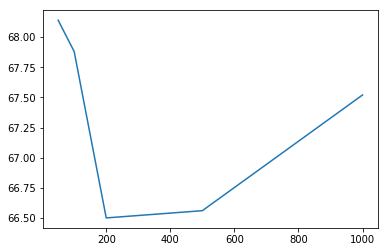

In [71]:
y = [i[0] for i in analytics5]
plt.plot(time_steps, y)

# Agent 6

In [61]:
analytics6 = []
time_steps = [50, 100, 200, 500, 1000]
for steps in time_steps:
    print(steps)
    success = 0
    fail1 = 0
    fail2 = 0
    agent_certain = 0
    total_steps = 0
    for j in range(50):  
        #print(j)
        G = Graphs[j]
        for runs in range(100):
            prey, pred, agent = init_rand_pos()
            #print("RUN #", runs)
            #print("init", prey, pred, agent)
            belief = init_pred_belief(pred)    
            time = 0
            while time < steps: 
                if certain(belief) != True:
                    survey_node = max_pred_belief(belief)
                    #print("survey_node", survey_node)

                    #print("before", belief, sum(belief))
                    if pred == survey_node:
                        belief = found(survey_node)
                    else:
                        belief = not_found(belief, G, survey_node)

                if certain(belief) == True:
                    agent_certain += 1
                
                #print("after survey", belief, sum(belief))
                pred_belief = max_pred_belief(belief)
                #print("pred_belief", pred_belief)
                select = False
                dis = []
                x = BFS(G, agent, pred_belief)
                y = BFS(G, agent, prey)
                for i in G[agent]:
                    #print("i", i)
                    prey_dis = BFSwPred(G, i, prey, pred_belief)  #finds distance from agent's neighbor to prey where predator is not int the path
                    #print("prey_dis", prey_dis)
                    if prey_dis == None:
                        break
                    #print("prey_dis", prey_dis)
                    pred_dis = BFS(G, i, pred_belief)


                    if prey_dis < y and pred_dis > x:
                        select = True
                    elif prey_dis < y  and pred_dis == x:
                        select = True
                    elif prey_dis == y and pred_dis > x:
                        select = True
                    elif prey_dis == y and pred_dis == x:
                        select = True
                    elif pred_dis > x:
                        select = True
                    elif pred_dis == x:
                        select = True

                    if select == True:
                        dis.append([i, prey_dis, pred_dis])

                #print(dis)

                if bool(dis) != False:
                    agent = next_pos_agent(dis)[0] 


                #print("next_pos", next_pos)       
                if agent == prey or agent == pred:
                    break

                belief = not_found(belief, G, agent)

                prey = move_prey(G, prey)


                pred = move_pred_distract(G, pred, agent)
                belief = move_pred_belief(G, belief, pred_belief, agent)
                #print("trans", belief, sum(belief))
                #print("move", prey, pred, agent)

                if agent == prey  or agent == pred:
                    break

                time += 1
                total_steps += 1
                #print("time",time)
            if agent == pred:
                fail1 += 1
            elif agent == prey:
                success += 1
            elif time == steps:
                fail2 += 1

    analytics6.append([success/50, fail1/50, fail2/50, agent_certain, total_steps])

50
100
200
500
1000


In [62]:
print(analytics6)

[[72.34, 27.02, 0.64, 26761, 48757], [72.74, 27.26, 0.0, 26669, 49824], [73.36, 26.64, 0.0, 27295, 50573], [73.28, 26.72, 0.0, 26802, 49957], [74.18, 25.82, 0.0, 27794, 51021]]


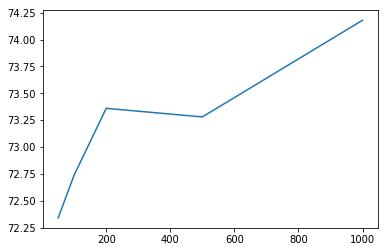

In [72]:
y = [i[0] for i in analytics6]
plt.plot(time_steps, y)

# Agent 7

In [63]:
analytics7 = []
time_steps = [50, 100, 200, 500, 1000]
for steps in time_steps:
    print(steps)
    success = 0
    fail1 = 0
    fail2 = 0
    total_steps = 0
    agent_certain_prey = 0 #counter for when agent's certain about prey's location
    agent_certain_pred = 0 #counter for when agent's certain about predator's location
    for j in range(50):  
        #print(j)
        G = Graphs[j]
        for runs in range(100):
            prey, pred, agent = init_rand_pos()
            #print("RUN #", runs)
            #print("init", prey, pred, agent)
            belief_prey = init_prey_belief(agent)  #initialize belief for prey
            belief_pred = init_pred_belief(pred)     #initialize belief for predator
            time = 0
            while time < steps: 
                #survey only predator if it is not certain about predator's location
                if certain(belief_pred) != True: 
                    survey_node = max_pred_belief(belief_pred)

                    #print("survey_node", survey_node)

                    #print("before", belief, sum(belief))
                    if pred == survey_node:
                        belief_pred = found(survey_node)
                    else:
                        belief_pred = not_found(belief_pred, G, survey_node)
                elif certain(belief_prey) != True: #if certain about predator andnot about prey then survey for prey
                    survey_node = max_prey_belief(belief_prey)

                    #print("survey_node", survey_node)

                    #print("before", belief, sum(belief))
                    if prey == survey_node:
                        belief_prey = found(survey_node)
                    else:
                        belief_prey = not_found(belief_prey, G, survey_node)

                if certain(belief_prey) == True: 
                    agent_certain_prey += 1

                if certain(belief_pred) == True: 
                    agent_certain_pred += 1
                #print("after survey", belief, sum(belief))
                pred_belief_loc = max_pred_belief(belief_pred)
                prey_belief_loc = max_prey_belief(belief_prey)
                #print("pred_belief", pred_belief)
                select = False
                dis = []
                x = BFS(G, agent, pred_belief_loc)
                y = BFS(G, agent, prey_belief_loc)
                for i in G[agent]:
                    #print("i", i)
                    prey_dis = BFS(G, i, prey_belief_loc)
                    #print("prey_dis", prey_dis)
                    if prey_dis == None:
                        break
                    #print("prey_dis", prey_dis)
                    pred_dis = BFS(G, i, pred_belief_loc)


                    if prey_dis < y and pred_dis > x:
                        select = True
                    elif prey_dis < y  and pred_dis == x:
                        select = True
                    elif prey_dis == y and pred_dis > x:
                        select = True
                    elif prey_dis == y and pred_dis == x:
                        select = True
                    elif pred_dis > x:
                        select = True
                    elif pred_dis == x:
                        select = True

                    if select == True:
                        dis.append([i, prey_dis, pred_dis])

                #print(dis)

                if bool(dis) != False:
                    agent = next_pos_agent(dis)[0] 


                #print("next_pos", next_pos)       
                if agent == prey or agent == pred:
                    break

                belief_prey = not_found(belief_prey, G, agent)
                belief_pred = not_found(belief_pred, G, agent)

                prey = move_prey(G, prey)          
                pred = move_pred_distract(G, pred, agent)

                belief_pred = move_pred_belief(G, belief_pred, pred_belief_loc, agent)
                belief_prey = move_prey_belief(belief_prey, G)
                #print("trans", belief, sum(belief))
                #print("move", prey, pred, agent)

                if agent == prey  or agent == pred:
                    break

                time += 1
                total_steps += 1
                #print("time",time)
            if agent == pred:
                fail1 += 1
            elif agent == prey:
                success += 1
            elif time == steps:
                fail2 += 1

    analytics7.append([success/50, fail1/50, fail2/50, agent_certain_prey, agent_certain_pred, total_steps])

50
100
200
500
1000


In [75]:
print(analytics7)

[[39.76, 55.96, 4.28, 83, 37300, 82590], [42.56, 57.3, 0.14, 103, 38286, 86534], [41.8, 58.2, 0.0, 90, 37939, 84506], [41.28, 58.72, 0.0, 91, 38932, 86502], [41.08, 58.92, 0.0, 98, 38811, 87582]]


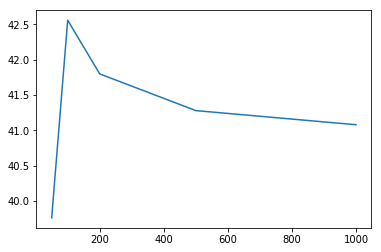

In [76]:
y = [i[0] for i in analytics7]
plt.plot(time_steps, y)

# Agent 8

In [77]:
analytics8 = []
time_steps = [50, 100, 200, 500, 1000]
for steps in time_steps:
    print(steps)
    success = 0
    fail1 = 0
    fail2 = 0
    total_steps = 0
    agent_certain_prey = 0
    agent_certain_pred = 0
    for j in range(50):  
        #print(j)
        G = Graphs[j]
        for runs in range(100):
            prey, pred, agent = init_rand_pos()
            #print("RUN #", runs)
            #print("init", prey, pred, agent)
            belief_prey = init_prey_belief(agent)
            belief_pred = init_pred_belief(pred)    
            time = 0
            while time < steps: 
                if certain(belief_pred) != True:
                    survey_node = max_pred_belief(belief_pred)
                    #print("survey_node", survey_node)

                    #print("before", belief, sum(belief))
                    if pred == survey_node:
                        belief_pred = found(survey_node)
                    else:
                        belief_pred = not_found(belief_pred, G, survey_node)
                elif certain(belief_prey) != True:
                    survey_node = max_prey_belief(belief_prey)

                    #print("survey_node", survey_node)

                    #print("before", belief, sum(belief))
                    if prey == survey_node:
                        belief_prey = found(survey_node)
                    else:
                        belief_prey = not_found(belief_prey, G, survey_node)

                if certain(belief_prey) == True: 
                    agent_certain_prey += 1

                if certain(belief_pred) == True: 
                    agent_certain_pred += 1

                #print("after survey", belief, sum(belief))
                pred_belief_loc = max_pred_belief(belief_pred)
                prey_belief_loc = max_prey_belief(belief_prey)
                #print("pred_belief", pred_belief)
                select = False
                dis = []
                x = BFS(G, agent, pred_belief_loc)
                y = BFS(G, agent, prey_belief_loc)
                for i in G[agent]:
                    #print("i", i)
                    prey_dis = BFSwPred(G, i, prey_belief_loc, pred_belief_loc) #finding shortest distance of the oath that does not inlude predator
                    #print("prey_dis", prey_dis)
                    if prey_dis == None:
                        break
                    #print("prey_dis", prey_dis)
                    pred_dis = BFS(G, i, pred_belief_loc)


                    if prey_dis < y and pred_dis > x:
                        select = True
                    elif prey_dis < y  and pred_dis == x:
                        select = True
                    elif prey_dis == y and pred_dis > x:
                        select = True
                    elif prey_dis == y and pred_dis == x:
                        select = True
                    elif pred_dis > x:
                        select = True
                    elif pred_dis == x:
                        select = True

                    if select == True:
                        dis.append([i, prey_dis, pred_dis])

                #print(dis)

                if bool(dis) != False:
                    agent = next_pos_agent(dis)[0] 


                #print("next_pos", next_pos)       
                if agent == prey or agent == pred:
                    break

                belief_prey = not_found(belief_prey, G, agent)
                belief_pred = not_found(belief_pred, G, agent)

                prey = move_prey(G, prey)          
                pred = move_pred_distract(G, pred, agent)

                belief_pred = move_pred_belief(G, belief_pred, pred_belief_loc, agent)
                belief_prey = move_prey_belief(belief_prey, G)
                #print("trans", belief, sum(belief))
                #print("move", prey, pred, agent)

                if agent == prey  or agent == pred:
                    break

                time += 1
                total_steps += 1
                #print("time",time)
            if agent == pred:
                fail1 += 1
            elif agent == prey:
                success += 1
            elif time == steps:
                fail2 += 1

    analytics8.append([success/50, fail1/50, fail2/50, agent_certain_prey, agent_certain_pred, total_steps])

50
100
200
500
1000


In [80]:
print(analytics8)

[[46.72, 46.32, 6.96, 97, 43135, 95458], [49.08, 50.62, 0.3, 98, 44109, 99098], [49.16, 50.84, 0.0, 124, 44076, 99420], [50.66, 49.34, 0.0, 106, 43756, 100630], [49.22, 50.78, 0.0, 102, 43892, 101191]]


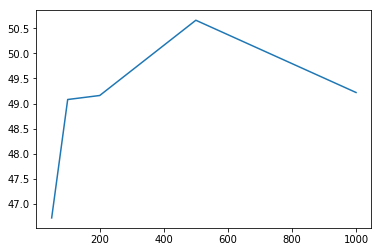

In [93]:
y = [i[0] for i in analytics8]
plt.plot(time_steps, y)

# Agent 7 with defective survey drone and unchanged belief updates

In [81]:
analytics7UB = []
time_steps = [50, 100, 200, 500, 1000]
for steps in time_steps:
    print(steps)
    success = 0
    fail1 = 0
    fail2 = 0
    total_steps = 0
    agent_certain_prey = 0
    agent_certain_pred = 0
    for j in range(50):
        #print(j)
        G = Graphs[j]
        for runs in range(100):
            prey, pred, agent = init_rand_pos()
            #print("RUN #", runs)
            #print("init", prey, pred, agent)
            belief_prey = init_prey_belief(agent)
            belief_pred = init_pred_belief(pred)    
            time = 0
            while time < steps: 
                if certain(belief_pred) != True:
                    survey_node = max_pred_belief(belief_pred)

                    #print("survey_node", survey_node)

                    #print("before", belief, sum(belief))
                    
                    
                    if pred == survey_node: #if survey drone found predator
                        defected = np.random.choice(2, 1, [0.9, 0.1]) 
                        if defected == 0:
                            belief_pred = found(survey_node)
                        elif defected == 1:
                            belief_pred = not_found(belief_pred, G, survey_node) #false negative
                    else:
                        belief_pred = not_found(belief_pred, G, survey_node)



                elif certain(belief_prey) != True:
                    survey_node = max_prey_belief(belief_prey)

                    #print("survey_node", survey_node)

                    #print("before", belief, sum(belief))
                    if prey == survey_node:
                        defected = np.random.choice(2, 1, [0.9, 0.1])
                        if defected == 0:
                            belief_prey = found(survey_node)
                        elif defected == 1:
                            belief_prey = not_found(belief_prey, G, survey_node) #false negative
                    else:
                        belief_prey = not_found(belief_prey, G, survey_node)

                if certain(belief_prey) == True: 
                    agent_certain_prey += 1
                if certain(belief_pred) == True: 
                    agent_certain_pred += 1

                #print("after survey", belief, sum(belief))
                pred_belief_loc = max_pred_belief(belief_pred)
                prey_belief_loc = max_prey_belief(belief_prey)
                #print("pred_belief", pred_belief)
                select = False
                dis = []
                x = BFS(G, agent, pred_belief_loc)
                y = BFS(G, agent, prey_belief_loc)
                for i in G[agent]:
                    #print("i", i)
                    prey_dis = BFS(G, i, prey_belief_loc)
                    #print("prey_dis", prey_dis)
                    if prey_dis == None:
                        break
                    #print("prey_dis", prey_dis)
                    pred_dis = BFS(G, i, pred_belief_loc)


                    if prey_dis < y and pred_dis > x:
                        select = True
                    elif prey_dis < y  and pred_dis == x:
                        select = True
                    elif prey_dis == y and pred_dis > x:
                        select = True
                    elif prey_dis == y and pred_dis == x:
                        select = True
                    elif pred_dis > x:
                        select = True
                    elif pred_dis == x:
                        select = True

                    if select == True:
                        dis.append([i, prey_dis, pred_dis])

                #print(dis)

                if bool(dis) != False:
                    agent = next_pos_agent(dis)[0] 


                #print("next_pos", next_pos)       
                if agent == prey or agent == pred:
                    break

                belief_prey = not_found(belief_prey, G, agent)
                belief_pred = not_found(belief_pred, G, agent)

                prey = move_prey(G, prey)          
                pred = move_pred_distract(G, pred, agent)

                belief_pred = move_pred_belief(G, belief_pred, pred_belief_loc, agent)
                belief_prey = move_prey_belief(belief_prey, G)
                #print("trans", belief, sum(belief))
                #print("move", prey, pred, agent)

                if agent == prey  or agent == pred:
                    break

                time += 1
                total_steps += 1
                #print("time",time)
            if agent == pred:
                fail1 += 1
            elif agent == prey:
                success += 1
            elif time == steps:
                fail2 += 1

    analytics7UB.append([success/50, fail1/50, fail2/50, agent_certain_prey, agent_certain_pred, total_steps])

50
100
200
500
1000


In [82]:
print(analytics7UB)

[[30.76, 67.32, 1.92, 55, 10801, 75113], [32.22, 67.78, 0.0, 62, 10719, 75569], [31.74, 68.26, 0.0, 54, 10636, 75757], [31.98, 68.02, 0.0, 42, 10657, 74738], [32.16, 67.84, 0.0, 62, 10794, 76693]]


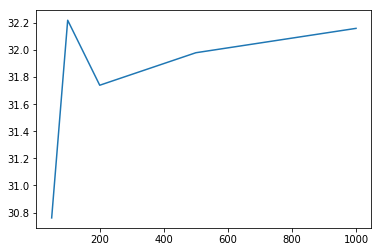

In [94]:
y = [i[0] for i in analytics7UB]
plt.plot(time_steps, y)

# Agent 8 with defective survey drone and unchanged belief updates

In [83]:
analytics8UB = []
time_steps = [50, 100, 200, 500, 1000]
for steps in time_steps:
    print(steps)
    success = 0
    fail1 = 0
    fail2 = 0
    total_steps = 0
    agent_certain_prey = 0
    agent_certain_pred = 0
    for j in range(50):  
        #print(j)
        G = Graphs[j]
        for runs in range(100):
            prey, pred, agent = init_rand_pos()
            #print("RUN #", runs)
            #print("init", prey, pred, agent)
            belief_prey = init_prey_belief(agent)
            belief_pred = init_pred_belief(pred)    
            time = 0
            while time < steps: 
                if certain(belief_pred) != True:
                    survey_node = max_pred_belief(belief_pred)

                    #print("survey_node", survey_node)

                    #print("before", belief, sum(belief))
                    defected = np.random.choice(2, 1, [0.9, 0.1])
                    if defected == 0:
                        if pred == survey_node:
                            belief_pred = found(survey_node)
                        else:
                            belief_pred = not_found(belief_pred, G, survey_node) #false negative

                    elif defected == 1:
                        belief_pred = not_found(belief_pred, G, survey_node)

                elif certain(belief_prey) != True:
                    survey_node = max_prey_belief(belief_prey)       
                    #print("survey_node", survey_node)
                    #print("before", belief, sum(belief))
                    if prey == survey_node:
                        defected = np.random.choice(2, 1, [0.9, 0.1])
                        if defected == 0:
                            belief_prey = found(survey_node)
                        elif defected == 1:
                            belief_prey = not_found(belief_prey, G, survey_node) #false negative
                    else:
                        belief_prey = not_found(belief_prey, G, survey_node)

                if certain(belief_prey) == True: 
                    agent_certain_prey += 1
                if certain(belief_pred) == True: 
                    agent_certain_pred += 1

                #print("after survey", belief, sum(belief))
                pred_belief_loc = max_pred_belief(belief_pred)
                prey_belief_loc = max_prey_belief(belief_prey)
                #print("pred_belief", pred_belief)
                select = False
                dis = []
                x = BFS(G, agent, pred_belief_loc)
                y = BFS(G, agent, prey_belief_loc)
                for i in G[agent]:
                    #print("i", i)
                    prey_dis = BFSwPred(G, i, prey_belief_loc, pred_belief_loc)
                    #print("prey_dis", prey_dis)
                    if prey_dis == None:
                        break
                    #print("prey_dis", prey_dis)
                    pred_dis = BFS(G, i, pred_belief_loc)


                    if prey_dis < y and pred_dis > x:
                        select = True
                    elif prey_dis < y  and pred_dis == x:
                        select = True
                    elif prey_dis == y and pred_dis > x:
                        select = True
                    elif prey_dis == y and pred_dis == x:
                        select = True
                    elif pred_dis > x:
                        select = True
                    elif pred_dis == x:
                        select = True

                    if select == True:
                        dis.append([i, prey_dis, pred_dis])

                #print(dis)

                if bool(dis) != False:
                    agent = next_pos_agent(dis)[0] 


                #print("next_pos", next_pos)       
                if agent == prey or agent == pred:
                    break

                belief_prey = not_found(belief_prey, G, agent)
                belief_pred = not_found(belief_pred, G, agent)

                prey = move_prey(G, prey)          
                pred = move_pred_distract(G, pred, agent)

                belief_pred = move_pred_belief(G, belief_pred, pred_belief_loc, agent)
                belief_prey = move_prey_belief(belief_prey, G)
                #print("trans", belief, sum(belief))
                #print("move", prey, pred, agent)

                if agent == prey  or agent == pred:
                    break

                time += 1
                total_steps += 1
                #print("time",time)
            if agent == pred:
                fail1 += 1
            elif agent == prey:
                success += 1
            elif time == steps:
                fail2 += 1

    analytics8UB.append([success/50, fail1/50, fail2/50, agent_certain_prey, agent_certain_pred, total_steps])

50
100
200
500
1000


In [84]:
print(analytics8UB)

[[33.14, 64.84, 2.02, 48, 10913, 79043], [33.98, 66.02, 0.0, 51, 11206, 81113], [32.82, 67.18, 0.0, 50, 10998, 80107], [34.88, 65.12, 0.0, 57, 11107, 79069], [34.06, 65.94, 0.0, 63, 10906, 79975]]


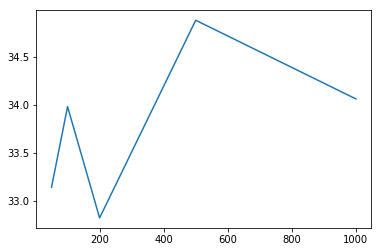

In [95]:
y = [i[0] for i in analytics8UB]
plt.plot(time_steps, y)

# Agent 7 with defective survey drone and corrected belief updates

In [87]:
def distracted_drone(not_found_belief, found_belief):
    not_found_belief = [0.9 * m for m in not_found_belief] #0.9 times the belief of each node
    found_belief = [0.1 * m for m in found_belief] #0.1 times the belief of each node
    
    return [not_found_belief[i] + found_belief[i] for i in range(50)] #adding both

In [89]:
analytics7CB = []
time_steps = [50, 100, 200, 500, 1000]
for steps in time_steps:
    print(steps)
    success = 0
    fail1 = 0
    fail2 = 0
    total_steps = 0
    agent_certain_prey = 0
    agent_certain_pred = 0
    for j in range(50):
        #print(j)
        G = Graphs[j]
        for runs in range(100):
            prey, pred, agent = init_rand_pos()
            #print("RUN #", runs)
            #print("init", prey, pred, agent)
            belief_prey = init_prey_belief(agent)
            belief_pred = init_pred_belief(pred)    
            time = 0
            while time < steps:             
                if certain(belief_pred) != True:
                    survey_node = max_pred_belief(belief_pred)

                    #print("survey_node", survey_node)

                    #print("before", belief, sum(belief))
                    
                    if pred == survey_node:
                        defected = np.random.choice(2, 1, [0.9, 0.1])
                        if defected == 0:
                            belief_pred = found(survey_node)
                        else:
                            belief_pred =  distracted_drone(not_found(belief_pred, G, survey_node), found(survey_node)) #corrected belief

                    else:
                        belief_pred = distracted_drone(not_found(belief_pred, G, survey_node), found(survey_node)) #corrected belief


                elif certain(belief_prey) != True:
                    survey_node = max_prey_belief(belief_prey)       
                    #print("survey_node", survey_node)
                    #print("before", belief, sum(belief))
                    defected = np.random.choice(2, 1, [0.9, 0.1])
                    if prey == survey_node:
                        defected = np.random.choice(2, 1, [0.9, 0.1])
                        if defected == 0:
                            belief_prey = found(survey_node)
                        else:
                            belief_prey =  distracted_drone(not_found(belief_prey, G, survey_node), found(survey_node)) #corrected belief

                    else:
                        belief_prey = distracted_drone(not_found(belief_prey, G, survey_node), found(survey_node)) #corrected belief

                if certain(belief_prey) == True: 
                    agent_certain_prey += 1
                if certain(belief_pred) == True: 
                    agent_certain_pred += 1

                #print("after survey", belief, sum(belief))
                pred_belief_loc = max_pred_belief(belief_pred)
                prey_belief_loc = max_prey_belief(belief_prey) 
                #print("pred_belief", pred_belief)

                select = False
                dis = []
                x = BFS(G, agent, pred_belief_loc)
                y = BFS(G, agent, prey_belief_loc)
                for i in G[agent]:
                    #print("i", i)
                    prey_dis = BFS(G, i, prey_belief_loc)
                    #print("prey_dis", prey_dis)
                    if prey_dis == None:
                        break
                    #print("prey_dis", prey_dis)
                    pred_dis = BFS(G, i, pred_belief_loc)


                    if prey_dis < y and pred_dis > x:
                        select = True
                    elif prey_dis < y  and pred_dis == x:
                        select = True
                    elif prey_dis == y and pred_dis > x:
                        select = True
                    elif prey_dis == y and pred_dis == x:
                        select = True
                    elif pred_dis > x:
                        select = True
                    elif pred_dis == x:
                        select = True

                    if select == True:
                        dis.append([i, prey_dis, pred_dis])

                #print(dis)

                if bool(dis) != False:
                    agent = next_pos_agent(dis)[0] 


                #print("next_pos", next_pos)       
                if agent == prey or agent == pred:
                    break

                belief_prey = not_found(belief_prey, G, agent)
                belief_pred = not_found(belief_pred, G, agent)

                prey = move_prey(G, prey)          
                pred = move_pred_distract(G, pred, agent)

                belief_pred = move_pred_belief(G, belief_pred, pred_belief_loc, agent)
                belief_prey = move_prey_belief(belief_prey, G)
                #print("trans", belief, sum(belief))
                #print("move", prey, pred, agent)

                if agent == prey  or agent == pred:
                    break

                time += 1
                total_steps += 1
                #print("time",time)
            if agent == pred:
                fail1 += 1
            elif agent == prey:
                success += 1
            elif time == steps:
                fail2 += 1

    analytics7CB.append([success/50, fail1/50, fail2/50, agent_certain_prey, agent_certain_pred, total_steps])

50
100
200
500
1000


In [90]:
print(analytics7CB)

[[30.44, 67.5, 2.06, 52, 10970, 74529], [30.12, 69.88, 0.0, 47, 11017, 74290], [31.52, 68.48, 0.0, 59, 10819, 72747], [29.98, 70.02, 0.0, 53, 11126, 76475], [30.72, 69.28, 0.0, 49, 10968, 74846]]


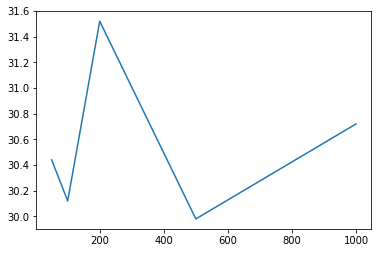

In [96]:
y = [i[0] for i in analytics7CB]
plt.plot(time_steps, y)

# Agent 8 with defective survey drone and corrected belief updates

In [98]:
analytics8CB = []
time_steps = [50, 100, 200, 500, 1000]
for steps in time_steps:
    #print(steps)
    success = 0
    fail1 = 0
    fail2 = 0
    total_steps = 0
    agent_certain_prey = 0
    agent_certain_pred = 0
    for j in range(50):  
        #print(j)
        G = Graphs[j]
        for runs in range(100):
            prey, pred, agent = init_rand_pos()
            #print("RUN #", runs)
            #print("init", prey, pred, agent)
            belief_prey = init_prey_belief(agent)
            belief_pred = init_pred_belief(pred)    
            time = 0
            while time < steps: 
                if certain(belief_pred) != True:
                    survey_node = max_pred_belief(belief_pred)

                    #print("survey_node", survey_node)

                    #print("before", belief, sum(belief))
                    if pred == survey_node:
                        defected = np.random.choice(2, 1, [0.9, 0.1])
                        if defected == 0:
                            belief_pred = found(survey_node)
                        else:
                            belief_pred =  distracted_drone(not_found(belief_pred, G, survey_node), found(survey_node))

                    else:
                        belief_pred = distracted_drone(not_found(belief_pred, G, survey_node), found(survey_node))

                elif certain(belief_prey) != True:
                    survey_node = max_prey_belief(belief_prey)       
                    #print("survey_node", survey_node)
                    #print("before", belief, sum(belief))
                    if prey == survey_node:
                        defected = np.random.choice(2, 1, [0.9, 0.1])
                        if defected == 0:
                            belief_prey = found(survey_node)
                        else:
                            belief_prey =  distracted_drone(not_found(belief_prey, G, survey_node), found(survey_node))

                    else:
                        belief_prey = distracted_drone(not_found(belief_prey, G, survey_node), found(survey_node))

                if certain(belief_prey) == True: 
                    agent_certain_prey += 1
                if certain(belief_pred) == True: 
                    agent_certain_pred += 1

                #print("after survey", belief, sum(belief))
                pred_belief_loc = max_pred_belief(belief_pred)
                prey_belief_loc = max_prey_belief(belief_prey) 
                #print("pred_belief", pred_belief)

                select = False
                dis = []
                x = BFS(G, agent, pred_belief_loc)
                y = BFS(G, agent, prey_belief_loc)
                for i in G[agent]:
                    #print("i", i)
                    prey_dis = BFSwPred(G, i, prey_belief_loc, pred_belief_loc)
                    #print("prey_dis", prey_dis)
                    if prey_dis == None:
                        break
                    #print("prey_dis", prey_dis)
                    pred_dis = BFS(G, i, pred_belief_loc)


                    if prey_dis < y and pred_dis > x:
                        select = True
                    elif prey_dis < y  and pred_dis == x:
                        select = True
                    elif prey_dis == y and pred_dis > x:
                        select = True
                    elif prey_dis == y and pred_dis == x:
                        select = True
                    elif pred_dis > x:
                        select = True
                    elif pred_dis == x:
                        select = True

                    if select == True:
                        dis.append([i, prey_dis, pred_dis])

                #print(dis)

                if bool(dis) != False:
                    agent = next_pos_agent(dis)[0] 


                #print("next_pos", next_pos)       
                if agent == prey or agent == pred:
                    break

                belief_prey = not_found(belief_prey, G, agent)
                belief_pred = not_found(belief_pred, G, agent)

                prey = move_prey(G, prey)          
                pred = move_pred_distract(G, pred, agent)

                belief_pred = move_pred_belief(G, belief_pred, pred_belief_loc, agent)
                belief_prey = move_prey_belief(belief_prey, G)
                #print("trans", belief, sum(belief))
                #print("move", prey, pred, agent)

                if agent == prey  or agent == pred:
                    break

                time += 1
                total_steps += 1
                #print("time",time)
            if agent == pred:
                fail1 += 1
            elif agent == prey:
                success += 1
            elif time == steps:
                fail2 += 1

    analytics8CB.append([success/50, fail1/50, fail2/50, agent_certain_prey, agent_certain_pred, total_steps])

In [99]:
print(analytics8CB)

[[30.06, 68.04, 1.9, 56, 11116, 75641], [32.1, 67.88, 0.02, 47, 11373, 78274], [31.12, 68.88, 0.0, 51, 11157, 78415], [31.02, 68.98, 0.0, 47, 11045, 77410], [31.1, 68.9, 0.0, 51, 11330, 78146]]


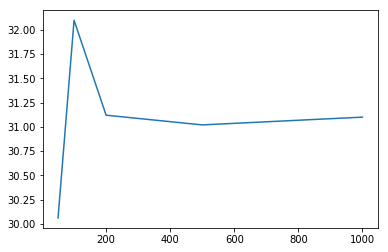

In [103]:
y = [i[0] for i in analytics8CB]
plt.plot(time_steps, y)